# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import io
import lxml





In [16]:

url = "https://en.wikipedia.org/wiki/List_of_most-streamed_songs_on_Spotify"
response = requests.get(url)

print("Estado:", response.status_code)



Estado: 200


In [17]:




response = requests.get("https://en.wikipedia.org/wiki/List_of_most-streamed_songs_on_Spotify")  

html = io.StringIO(response.text)
tables = pd.read_html(html)
print(f"Se encontraron {len(tables)} tablas.")

Se encontraron 27 tablas.


In [19]:

df = tables[0] 
df.head() 

,Rank,Song,Artist(s),Streams (billions),Release date,Ref.
0,1,"""Blinding Lights""",The Weeknd,4.855,29 November 2019,[2]
1,2,"""Shape of You""",Ed Sheeran,4.377,6 January 2017,[3]
2,3,"""Someone You Loved""",Lewis Capaldi,3.916,8 November 2018,[4]
3,4,"""Starboy""",The Weeknd and Daft Punk,3.910,21 September 2016,[5]
4,5,"""As It Was""",Harry Styles,3.891,1 April 2022,[6]


In [20]:
df.columns = ["Rank", "Song", "Artist", "Streams (billions)", "Date released", "Reference"]

df["Song"] = df["Song"].str.replace(r"\[.*?\]", "", regex=True)
df["Artist"] = df["Artist"].str.replace(r"\[.*?\]", "", regex=True)

df = df[df["Streams (billions)"].astype(str).str.contains(r"^\d+(?:\.\d+)?$", na=False)].copy()

df["Streams (billions)"] = df["Streams (billions)"].astype(float)

df["Date released"] = pd.to_datetime(df["Date released"], errors="coerce")

df


    

,Rank,Song,Artist,Streams (billions),Date released,Reference
0,1,"""Blinding Lights""",The Weeknd,4.855,2019-11-29,[2]
1,2,"""Shape of You""",Ed Sheeran,4.377,2017-01-06,[3]
2,3,"""Someone You Loved""",Lewis Capaldi,3.916,2018-11-08,[4]
3,4,"""Starboy""",The Weeknd and Daft Punk,3.910,2016-09-21,[5]
4,5,"""As It Was""",Harry Styles,3.891,2022-04-01,[6]
...,...,...,...,...,...,...
95,96,"""Too Good at Goodbyes""",Sam Smith,2.309,2017-09-08,[97]
96,97,"""Someone Like You""",Adele,2.303,2011-01-24,[98]
97,98,"""Stay with Me""",Sam Smith,2.300,2014-04-14,[99]
98,99,"""Havana""",Camila Cabello and Young Thug,2.289,2017-08-03,[100]


In [21]:
conn = sqlite3.connect("spotify_top_songs.db")
df.to_sql("most_streamed", conn, if_exists="replace", index=False)
cursor = conn.cursor()
cursor.execute("SELECT COUNT(*) FROM most_streamed")
print("Rows inserted:", cursor.fetchone()[0])

conn.commit()
conn.close()

Rows inserted: 100


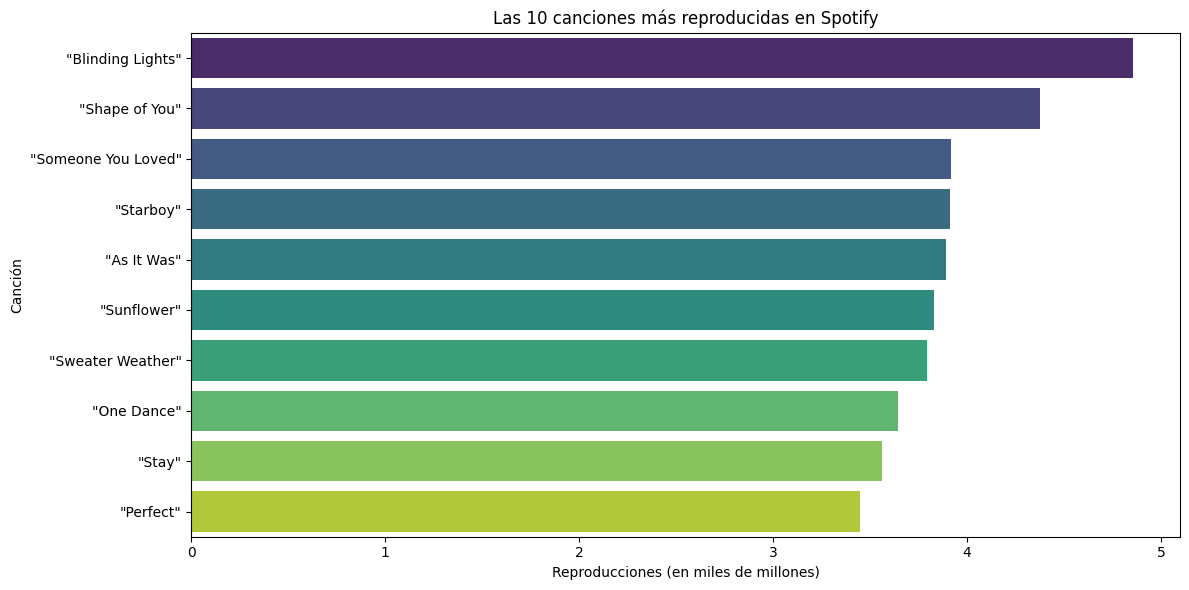

In [22]:


 #Las 10 canciones más reproducidas
top10 = df.nlargest(10, "Streams (billions)")
plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x="Streams (billions)", y="Song", hue="Song", palette="viridis", legend=False)
plt.title("Las 10 canciones más reproducidas en Spotify")
plt.xlabel("Reproducciones (en miles de millones)")
plt.ylabel("Canción")
plt.tight_layout()
plt.show()

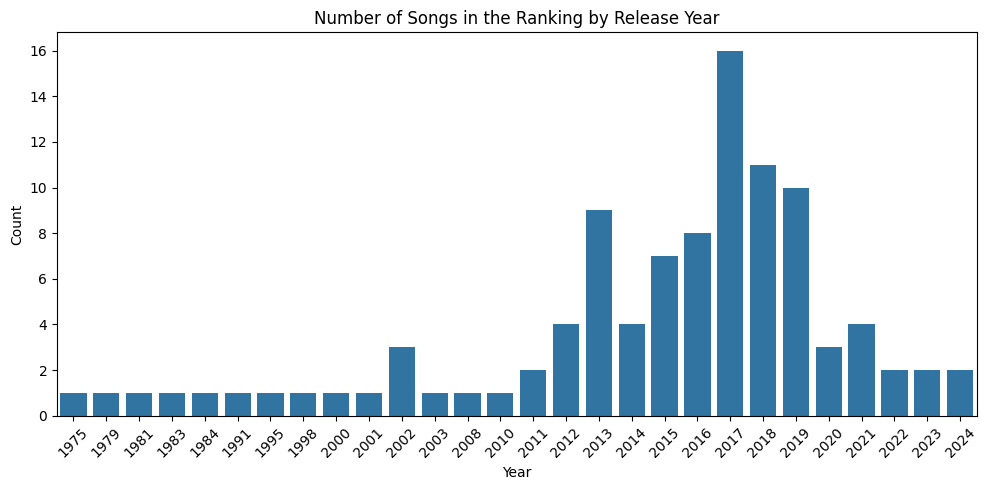

In [23]:
#Numero de canciones por año
df["Year"] = df["Date released"].dt.year
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Year", order=sorted(df["Year"].dropna().unique()))
plt.title("Number of Songs in the Ranking by Release Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

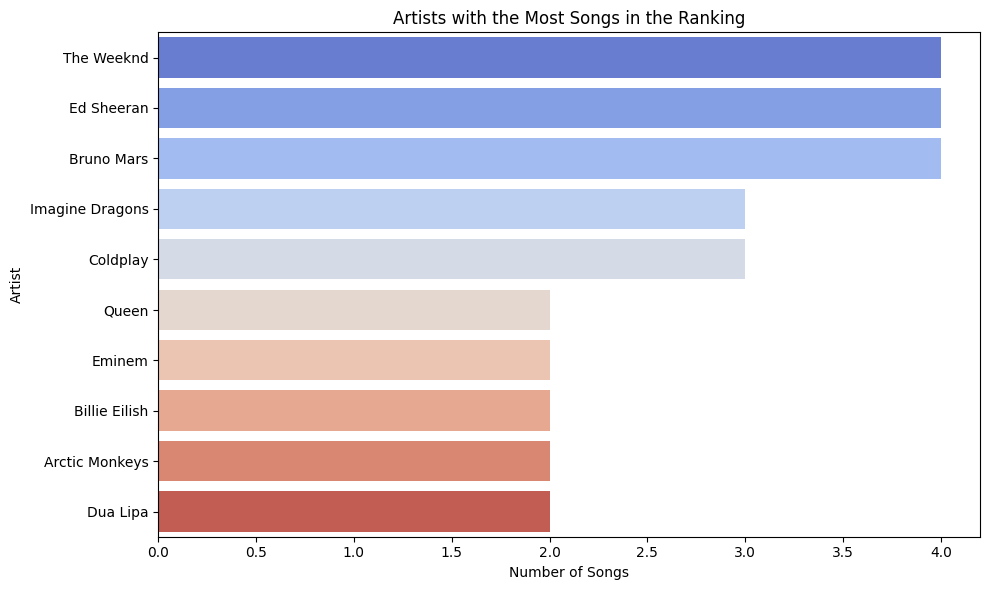

In [25]:
#Artistas con mas canciones en el Rankimg
artists = df["Artist"].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=artists.values, y=artists.index, hue=artists.index, palette="coolwarm", legend=False)
plt.title("Artists with the Most Songs in the Ranking")
plt.xlabel("Number of Songs")
plt.ylabel("Artist")
plt.tight_layout()
plt.show()